In [42]:
# =============================================
# STEP 1: IMPORT LIBRARIES AND LOAD DATA
# =============================================
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
import seaborn as sns

In [43]:
# Load dataset
df = pd.read_csv('./Phishing_Email.csv')
df.head()
df.shape

(18650, 3)

In [44]:
# =============================================
# STEP 2: DATA PREPROCESSING
# =============================================

# Handle missing values (Imputation)
# Remove emails with missing labels
df = df.dropna(subset=['Email Type'])  
# Fill empty email texts with empty string
df['Email Text'] = df['Email Text'].fillna('')

In [45]:
# Text cleaning function
def replace_tags(doc):
    """Clean text by:
    1. Removing HTML line breaks
    2. Removing URLs
    3. Converting to lowercase"""
    doc = doc.replace("<br />", " ")  # Remove HTML tags
    doc = re.sub("https://\S*", "", doc)  # Remove URLs
    return doc.lower()  # Standardize text

In [46]:
# Apply cleaning to all emails
df["Email Text"] = df["Email Text"].apply(replace_tags)

In [47]:
# Bag of Words (BoW) Feature Extraction
# Converts text to numerical features by counting word frequencies
vectorizer = CountVectorizer(max_features=10_000, stop_words="english")

In [48]:
# Split data (70% training, 30% testing)
X = df['Email Text']
y = df["Email Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

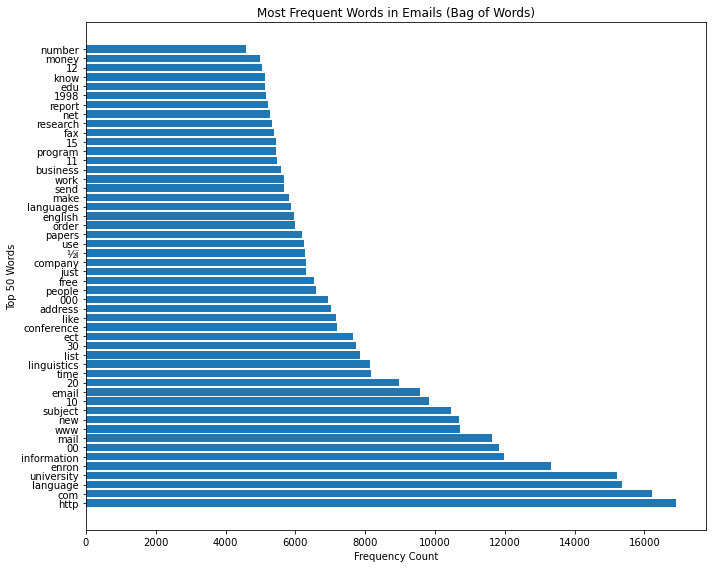

In [49]:
# =============================================
# BAG OF WORDS VISUALIZATION (UPDATED)
# =============================================

# Fit vectorizer and get word frequencies
vectorizer = CountVectorizer(max_features=50, stop_words="english")  # Top 50 words
bow_matrix = vectorizer.fit_transform(X_train)
word_counts = bow_matrix.sum(axis=0).A1  # Sum word occurrences
feature_names = vectorizer.get_feature_names_out()

# Create frequency dataframe
word_freq = pd.DataFrame({
    'Word': feature_names,
    'Frequency': word_counts
}).sort_values('Frequency', ascending=False)

# Create horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(word_freq['Word'][::-1], word_freq['Frequency'][::-1])  # Reverse for descending order
plt.xlabel("Frequency Count")
plt.ylabel("Top 50 Words")
plt.title("Most Frequent Words in Emails (Bag of Words)")
plt.gca().invert_yaxis()  # Show highest frequency at top
plt.tight_layout()
plt.show()

In [50]:
# =============================================
# MODIFIED CODE WITH TIME TRACKING AND SVM FIX
# =============================================
import time  # Add this import at the top

# ... [keep previous imports and data loading] ...

# =============================================
# MODIFIED MODEL TRAINING SECTION WITH TIMING
# =============================================

def train_model(model, model_name):
    """Train model with time tracking"""
    start_time = time.time()
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    print(f"{model_name} trained in {training_time:.2f} seconds")
    return model, training_time

In [51]:
# Model 1: Logistic Regression
lr_pipe, lr_time = train_model(
    make_pipeline(
        CountVectorizer(max_features=10_000, stop_words="english"),
        LogisticRegression(max_iter=1000, C=0.1)
    ),
    "Logistic Regression"
)

Training Logistic Regression...
Logistic Regression trained in 2.92 seconds


In [52]:
# Model 2: Random Forest
rf_pipe, rf_time = train_model(
    make_pipeline(
        CountVectorizer(max_features=10_000, stop_words="english"),
        RandomForestClassifier(n_jobs=-1, random_state=123)
    ),
    "Random Forest"
)

Training Random Forest...
Random Forest trained in 5.12 seconds


In [53]:
# Model 3: Naive Bayes
nb_pipe, nb_time = train_model(
    make_pipeline(
        CountVectorizer(max_features=10_000, stop_words="english"),
        MultinomialNB()
    ),
    "Naive Bayes"
)

Training Naive Bayes...
Naive Bayes trained in 2.87 seconds


In [54]:
# Model 4: SVM with increased iterations
svm_pipe, svm_time = train_model(
    make_pipeline(
        CountVectorizer(max_features=10_000, stop_words="english"),
        LinearSVC(dual=False, max_iter=10000, random_state=123)  # Increased max_iter
    ),
    "SVM"
)

Training SVM...
SVM trained in 17.83 seconds


In [55]:
# Ensemble Model
ensemble, ensemble_time = train_model(
    VotingClassifier(estimators=[
        ('lr', lr_pipe),
        ('rf', rf_pipe),
        ('nb', nb_pipe),
        ('svm', svm_pipe)
    ], voting='hard'),
    "Ensemble Model"
)

Training Ensemble Model...
Ensemble Model trained in 27.41 seconds


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 11)